In [1]:
import CellScopes as cs

WebIO._IJuliaInit()

Welcome to use CellScopes.jl!


### Step 1. Load visium data following CellScopes tutorial at https://github.com/HaojiaWu/CellScopes.jl/tree/main/docs/visium_tutorial

In [2]:
@time dkd1 = cs.read_visium("../../data/AJHM365_dkd/outs/")

 62.442977 seconds (526.30 M allocations: 20.471 GiB, 6.75% gc time, 20.95% compilation time: 26% of which was recompilation)


VisiumObject in CellScopes.jl


Genes x Cells = 18063 x 2802
Available data:
- rawCount
- metaData
- spmetaData
- imageData
All fields:
- rawCount
- normCount
- scaleCount
- metaData
- spmetaData
- varGene
- dimReduction
- clustData
- imageData


### Step 2. Normalize data

In [18]:
@time dkd1 = cs.normalize_object(dkd1; scale_factor = 10000);

  1.317604 seconds (61.72 k allocations: 826.588 MiB, 8.24% gc time)


### Step 3. Add meta data for Morph-based annotations

In [4]:
using CSV
using DataFrames

In [5]:
anno_df = CSV.read("../../meta/Morph-based_v2.csv", DataFrame);

In [6]:
size(anno_df)
first(anno_df, 5)

Row,Barcode,Morph-based
,String31,String15
1,AACACTTGGCAAGGAA-1,Tumor
2,AACAGGATTCATAGTT-1,Glomeruli
3,AACAGGTTATTGCACC-1,PT
4,AACAGGTTCACCGAAG-1,LH-CD
5,AACAGTCAGGCTCCGC-1,Other


In [7]:
dkd1.metaData.cluster = String.(anno_df[!,"Morph-based"]);

In [8]:
dkd1.spmetaData.cluster = String.(anno_df[!,"Morph-based"]);

In [9]:
cell_anno = ["Glomeruli", "PT", "Inj-T", 
    "LH-CD", "Cast-T", "TLS", 
    "I-IFTA",
    "Artery-C", "Artery-K", 
    "Tumor", "Capsule", 
    "Other"]
c_map = ["#FFFF00", "#a7c957", "#6a994e", 
    "#90e0ef", "#0096c7", "#800080", 
    "#A95C68", 
    "#ff5a5f", "#AD002A", 
    "#495057", "#BF8F00", 
    "#ced4da"]
anno_color=Dict(cell_anno .=> c_map);

In [10]:
using CairoMakie

In [11]:
empty_theme = Theme(
    Axis = (
        backgroundcolor = :transparent,
        leftspinevisible = false,
        rightspinevisible = false,
        bottomspinevisible = false,
        topspinevisible = false,
        xticklabelsvisible = false, 
        yticklabelsvisible = false,
        xgridcolor = :transparent,
        ygridcolor = :transparent,
        xminorticksvisible = false,
        yminorticksvisible = false,
        xticksvisible = false,
        yticksvisible = false,
        xautolimitmargin = (0.0,0.0),
        yautolimitmargin = (0.0,0.0),
    )
);

update_theme!(empty_theme)

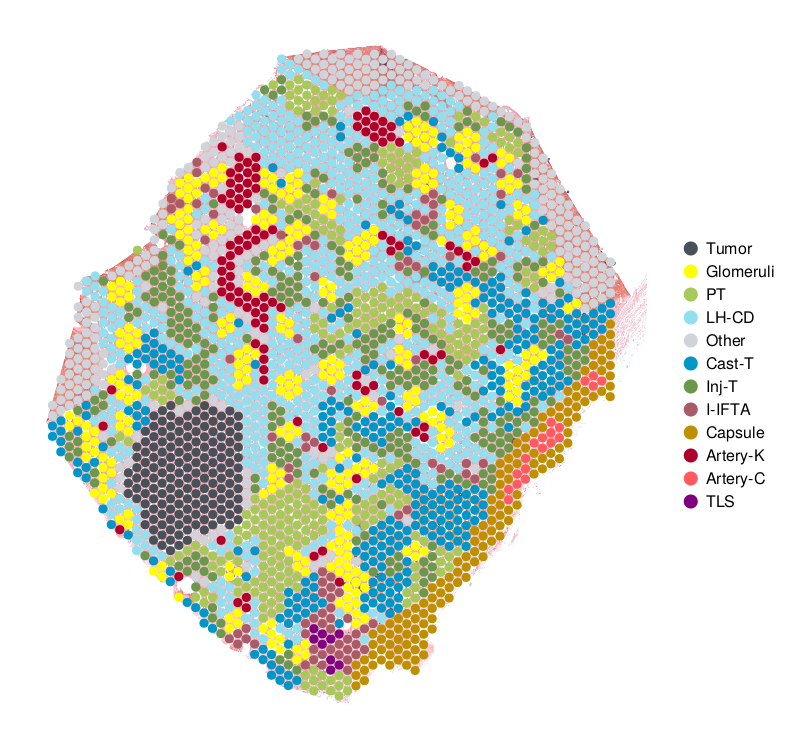

In [12]:
p = cs.sp_dim_plot(dkd1, "cluster"; 
    marker_size = 13, canvas_size = (800,750), adjust_contrast=1.5, adjust_brightness = 0.1,
    do_label=false, alpha=1, img_res="high", anno_color=anno_color);

p

In [13]:
mkpath("../../plots/version_1/main_figures_cs")
mkpath("../../plots/version_1/supp_figures_cs")

"../../plots/version_1/supp_figures_cs"

In [14]:
save("../../plots/version_1/main_figures_cs/spDimPlot_cs_hires.pdf", p)
save("../../plots/version_1/main_figures_cs/spDimPlot_cs_hires.png", p)

CairoMakie.Screen{IMAGE}


### Step 3. Save as cs object

In [15]:
cs.save(dkd1; filename = "../../processed_data/version_1/dkd1_by_CS.jld2") 

### misc: Pkg version

In [16]:
using Pkg
pkgs = Pkg.installed();

┌ Warning: Pkg.installed() is deprecated
└ @ Pkg ~/julia-1.9.4/share/julia/stdlib/v1.9/Pkg/src/Pkg.jl:745


In [17]:
pkgs

Dict{String, VersionNumber} with 6 entries:
  "CSV"        => v"0.10.11"
  "CairoMakie" => v"0.10.12"
  "IJulia"     => v"1.24.2"
  "DataFrames" => v"1.6.1"
  "Leiden"     => v"0.1.0"
  "CellScopes" => v"0.1.0"